# TVB-NEST: Bridging multiscale activity by co-simulation

## Step-by-step learn how to perform a co-simulation embedding spiking neural networks into large-scale brain networks using TVB.

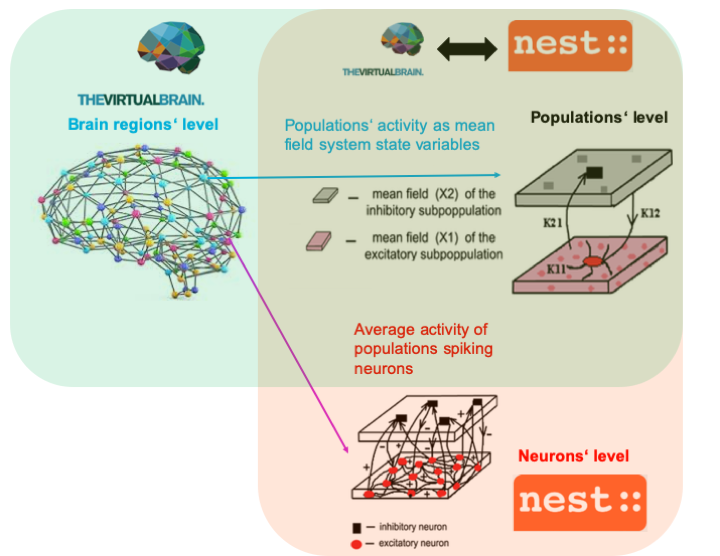

In [1]:
from IPython.core.display import Image, display
display(Image(filename='./ConceptGraph.png',  width=1000, unconfined=False))

## tvb-multiscale toolbox:

### https://github.com/the-virtual-brain/tvb-multiscale

For questions use the git issue tracker, or write an e-mail to me: dionysios.perdikis@charite.de

### TVB - NEST co-simulation with Reduced Wong-Wang model

We demonstrate a multiscale simulation <br> of a reduced Wong-Wang model [3] <br> using TVB [1, 2] for brain region modelled at coarse scale, <br> and NEST [4] for regions modelled as <br> networks of spiking neural populations.

## Reduced Wong-Wang mean field model


Synaptic gating dynamics (i.e., proportion of synapse channels open at any given time):

$\dot{S_i}^{(E)} = - \frac{1}{\tau_E}{S_i}^{(E)} + (1-{S_i}^{(E)})\gamma_{E} {r_i}^{(E)}$

$\dot{S_i}^{(I)} = - \frac{1}{\tau_I}{S_i}^{(I)} + \gamma_I{r_i}^{(I)}$

where we bound ${S_i}^{(E/I)} \in $ [0.0, 1.0], 

and $ {r_i}^{(E/I)} $ is the firing rate given by:

$ {r_i}^{(E/I)} = H({I_{syn_i}}^{(E/I)}, a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) $

where

$ H({I_{syn_i}}^{(E/I)},  a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) = \frac{a_{(E/I)}{I_{syn_i}}^{(E/I)}-b_{(E/I)}}{1-e^{-d_{(E/I)}(a_{(E/I)}{I_{syn_i}}^{(E/I)}-b_{(E/I)})}}$ 

is a sigmoidal input->output function of the input synaptic current.

The total input synaptic current to excitatory populations is given by: 

$ {I_{syn_i}}^{(E)} = W_EI_o + w_+J_{NMDA}{S_i}^{(E)} - J_{i}{S_i}^{(I)} + GJ_{NMDA}\sum_{j\neq i}C_{ij}S_{j}^{(E)}(t-\tau_{ij})$

and to inhibitory ones:

$ {I_{syn_i}}^{(I)} = W_II_o + J_{NMDA}{S_i}^{(E)} - {S_i}^{(I)} +  \lambda GJ_{NMDA}\sum_{j\neq i}C_{ij}S_{j}^{(E)}(t-\tau_{ij})$

where 
$\lambda  \in${0, 1} for (not) allowing feedforward inhibition, respectively.

TVB connectivity weights $C_{ij}$ are scaled per "region"

## Reduced Wong-Wang mean field model

## Parameters following Ponce-Alvarez et al 2014:

- structural TVB connectivity weights $C_{ij}$
- structural TVB connectivity delays $\tau_{ij}$
- global structural brain connectivity coupling constant $G$
- overall effective external input current $I_o = 0.382nA$ 
- excitatory synaptic coupling $J_{NDMA} = 0.15nA$ 
- local feedback inhibitory synaptic coupling $J_{i} = 1.0nA$ 
- local excitatory recurrence $w_+ = 1.4$
- excitatory kinetic parameter $\gamma_E = 0.641 s$
- inhibitory kinetic parameter $\gamma_I = 1.0 s$
- excitatory (NMDA) time constant $\tau_E = \tau_{NMDA}=100ms$ 
- inhibitory (GABA) time constant $\tau_I = \tau_{GABA}=10ms$ 
- excitatory pool scaling constant $W_E = 1.0$
- inhibitory pool scaling constant $W_I = 0.7$
- excitatory sigmoidal functions parameters $a_{E} = 310nC^{-1}$, $b_{E} = 125Hz$, $d_{E} = 0.16s$
- inhibitory sigmoidal functions parameters $a_{I} = 615nC^{-1}$, $b_{I} = 177Hz$, $d_{I} = 0.087s$
- $\lambda = 1$, allowing for feedforward inhibition


## Spiking network model in NEST

For every neuron $i$ in region node $n$:


$ C_m{\dot{V}_{ni}}^m = - {I_{ni}}^L - {I_{ni}}^{AMPA} - {I_{ni}}^{NMDA} - {I_{ni} ^{GABA}}- \sum_{n\prime \neq n}{I_{n\prime \neq ni}}^{AMPA,ext} +{I_{ni}}^{ext} $

$\;\;\;\;\;\;\;\;\;\;=-g_m({V_{ni}}^m - V_L) $
              
$\;\;\;\;\;\;\;\;\;\;\;-g_{AMPA}({V_{ni}}^m - V_E)w_E{S_{ni}}^{AMPA} $

$\;\;\;\;\;\;\;\;\;\;\;-\frac{g_{NMDA}({V_{ni}}^m - V_E)}{1+\lambda_{NMDA}e^{-\beta{V_{ni}}^m}}w_E{S_{ni}}^{NMDA} $

$\;\;\;\;\;\;\;\;\;\;\;-g_{GABA}({V_{ni}}^m - V_I)w_I{S_{ni}}^{GABA} $

$\;\;\;\;\;\;\;\;\;\;\;-g_{AMPA,ext}({V_{ni}}^m - V_E)G\sum_{n\prime \neq n}C_{n\prime \neq n}{S_{n\prime \neq ni}}^{AMPA,ext} $

$\;\;\;\;\;\;\;\;\;\;\;+{I_{ni}}^{ext} $

$ {\dot{S}_{ni}}^{AMPA/GABA} = -\frac{1}{\tau_{AMPA/GABA,decay}}{S_{ni}}^{AMPA/GABA} + \left[ \sum_{j=1,j \neq i}^{N_{E/I}} \sum_k \delta(t-{t_j}^k) \right]_{j \in n}$

$ {\dot{X}_{ni}}^{NMDA} = -\frac{1}{\tau_{NMDA,rise}}{X_{ni}}^{NMDA} + \left[ \sum_{j=1,j \neq i}^{N_E} \sum_k \delta(t-{t_j}^k) \right]_{j \in n} $

$ {\dot{S}_{ni}}^{NMDA} = -\frac{1}{\tau_{NMDA,decay}}{S_{ni}}^{NMDA} + \alpha {X_{ni}}^{NMDA} (1 - \frac{1}{N_E-1}{S_{ni}}^{NMDA}) $

$ {\dot{S}_{n\prime \neq ni}}^{AMPA,ext} = -\frac{1}{\tau_{AMPA,decay}}{S_{n\prime \neq ni}}^{AMPA,ext} + \left[ \sum_{j=1}^{N_E} \sum_k \delta(t-{t_j}^k) \right]_{j \in n\prime, n\prime \neq n} $

Boundaries assuming that self-connections of neurons are not possible:

For excitatory neurons:

$ {S_{exc}}^{AMPA/NMDA} \in [0.0, N_E-1]$

$ {S_{exc}}^{GABA} \in [0.0, N_I]$

For inhibitory neurons:

$ {S_{inh}}^{AMPA/NMDA} \in [0.0, N_E]$

$ {S_{inh}}^{GABA} \in [0.0, N_I-1]$

For all neurons:

$ {S_{exc/inh}}^{AMPA,ext} \in [0.0, N_E]$

When $V_m > V_{th}$, emit a spike and clamp $V_m$ to $V_{reset}$ for $\tau_{ref}$ ms.


## Interfacing (coupling) TVB $\rightarrow$ NEST

#### Coupling a TVB region node state variable to a NEST population of a brain region node.

We assume that at each NEST region node, we place an excitatory (E) and an inhibitory (I) population of spiking neurons


### A. Current

$ TVB \big\{ N_E * GJ_{NMDA}\sum_{n'\in TVB->n\in NEST}C_{nn'}S_{n}^{(E)}(t-\tau_{nn'}) \big\} \rightarrow NEST \big\{ {I_{ext_i}} ^ {(E/I,\; n\in NEST)} \big\} $

#### 1. Using NEST dc generator stimulating devices as TVB "proxy" nodes:

$interfaceWeight_{𝑛′∈𝑇𝑉𝐵} * TVB \big\{ N_E * J_{NMDA}S_{𝑛′∈𝑇𝑉𝐵}^{(E)}(t) \big\} $ 
    
$\;\;\;\;\;\; \rightarrow NEST \big\{ "TVB \; proxy \; nodes \; as \; NEST \; dc \; generators" \;: $

$ \;\;\;\;\;\;\;\;\; interfaceWeight_{𝑛′∈𝑇𝑉𝐵} * N_E * J_{NMDA}C_{nn'}S_{𝑛′∈𝑇𝑉𝐵}^{(E)}(t-\tau_{nn}') \big\}$
    
$\;\;\;\;\;\;\;\;\;\;\;\; \rightarrow NEST \big\{ {I_{ext_i}} ^ {(E/I,\; n\in NEST)} \big\} $


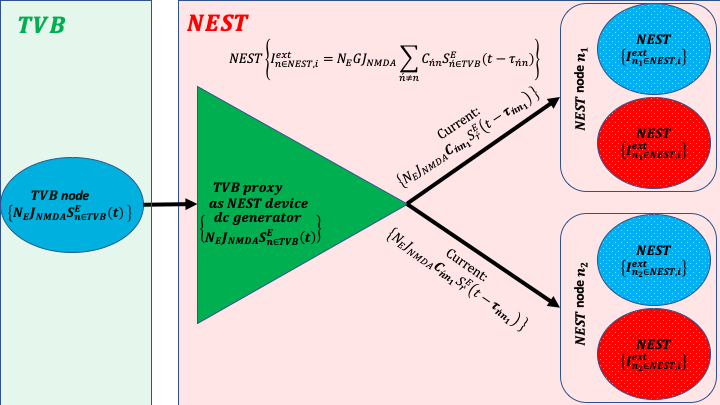

In [2]:
display(Image(filename='./DC.png',  width=1000, unconfined=False))

#### 2. Directly setting ${I_{ext_i}} ^ {(E/I,\; n\in NEST)}$ NEST parameter with TVB coupling input:

$interfaceWeight_{n\in NEST} \big\{ N_E * GJ_{NMDA}\sum_{n'\in TVB->n\in NEST}C_{nn'}S_{n}^{(E)}(t-\tau_{nn'}) \big\} \rightarrow NEST \big\{ {I_{ext_i}} ^ {(E/I,\; n\in NEST)} \big\} $

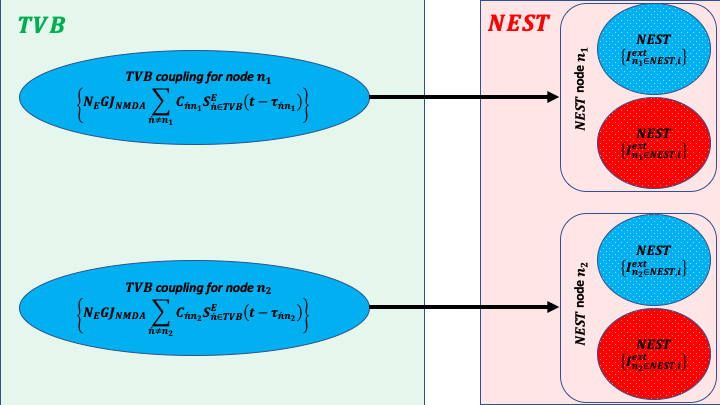

In [3]:
display(Image(filename='./Ie.png',  width=1000, unconfined=False))

### B.  Instantaneous mean  spike rate 
$interfaceWeight_{𝑛′∈𝑇𝑉𝐵}TVB \big\{ r_{𝑛′∈𝑇𝑉𝐵}^{(E)}(t) \big\} $ 
    
$\;\;\;\;\;\; \rightarrow NEST \big\{  "TVB \; proxy \; nodes \; as \; NEST \; poisson \; generators"\;: $

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  
\sum_{i\in N_{(E/I)}}\sum_k\delta(t-({t_i}^k + \tau_{nn'})) \big \} $

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; 
\rightarrow NEST \big \{ {I_{syn_i}} ^ {(E/I,\; n\in NEST)} \big\} $

where $\delta(t) = 1$ for $t=0$, and 0 otherwise

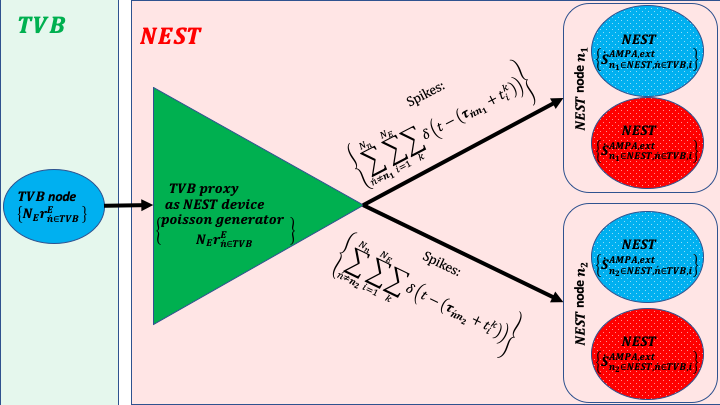

In [4]:
display(Image(filename='./Rate.png',  width=1000, unconfined=False))

## Interfacing (updating) TVB $\leftarrow$ NEST

### Instantaneous mean spike rate 

$TVB${$r_{n\in NEST}^{(E/I)}$}$ \leftarrow N_{n\in NEST}$ "spike detector devices" { $\frac{{{\sum_{i\in N_{(E/I)}}\sum_k\delta(t-{t_i}^k)}_{n\in NEST}}}{N_{E/I}} * \frac{1}{dt}$}

where $dt$ is the TVB integration time step

In [5]:
display(Image(filename='./NEST->TVB.png',  width=1000, unconfined=False))

## Simulator loop

### Simulating several (i.e., 10) NEST time steps for every 1 TVB time step for stable integration

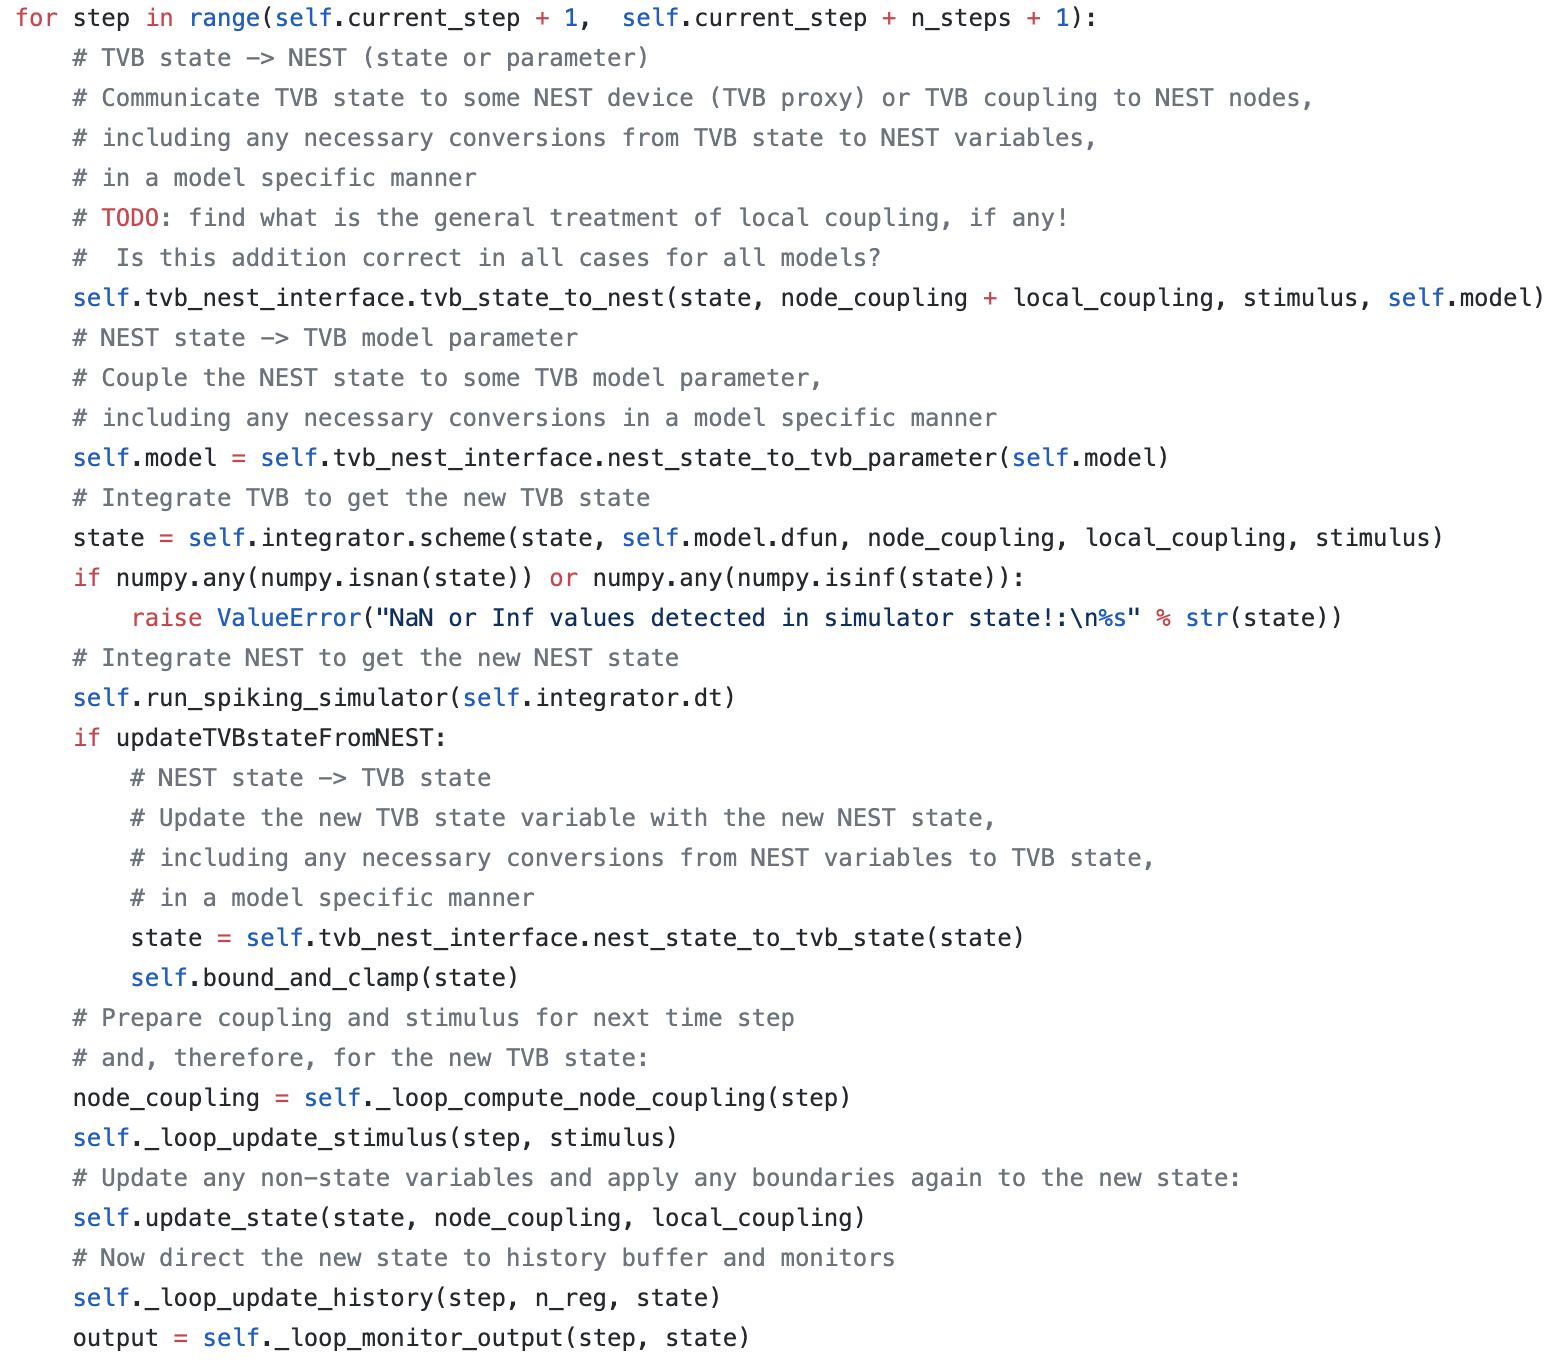

In [6]:
display(Image(filename='./simulator_loop.png',  width=600, unconfined=False))

In [7]:
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_nest.config import *
config = Config()
config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'

from tvb_multiscale.plot.plotter import Plotter
plotter = Plotter(config)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

2020-01-13 17:33:45,501 - INFO - numexpr.utils - NumExpr defaulting to 6 threads.


/home/docker/packages/tvb-root/scientific_library/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


2020-01-13 17:33:46,521 - DEBUG - matplotlib - $HOME=/home/docker
2020-01-13 17:33:46,522 - DEBUG - matplotlib - CONFIGDIR=/home/docker/.config/matplotlib
2020-01-13 17:33:46,526 - DEBUG - matplotlib - matplotlib data path: /usr/share/matplotlib/mpl-data
2020-01-13 17:33:46,529 - DEBUG - matplotlib - loaded rc file /etc/matplotlibrc
2020-01-13 17:33:46,533 - DEBUG - matplotlib - matplotlib version 3.0.2
2020-01-13 17:33:46,534 - DEBUG - matplotlib - interactive is False
2020-01-13 17:33:46,535 - DEBUG - matplotlib - platform is linux
2020-01-13 17:33:46,536 - DEBUG - matplotlib - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_colle

2020-01-13 17:33:46,579 - DEBUG - matplotlib - CACHEDIR=/home/docker/.cache/matplotlib
2020-01-13 17:33:46,582 - DEBUG - matplotlib.font_manager - Using fontManager instance from /home/docker/.cache/matplotlib/fontlist-v300.json
2020-01-13 17:33:46,725 - DEBUG - matplotlib.pyplot - Loaded backend agg version unknown.
2020-01-13 17:33:47,378 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.projections.ProjectionMatrix.conductances = Attr(field_type=<class 'dict'>, default={'air': 0.0, 'skin': 1.0, 'skull': 0.01, 'brain': 1.0}, required=False)
2020-01-13 17:33:47,415 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.time_series.TimeSeries.labels_dimensions = Attr(field_type=<class 'dict'>, default={}, required=True)
2020-01-13 17:33:47,528 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab

## 1. Load structural data <br> (minimally a TVB connectivity)

2020-01-13 17:33:47,624 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fca933e7828>
2020-01-13 17:33:47,625 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2020-01-13 17:33:47,626 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fca933e7828>
2020-01-13 17:33:47,627 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2020-01-13 17:33:47,798 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:33:47,805 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2020-01-13 17:33:47,853 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans ('/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2020-01-13 17:33:48,140 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans

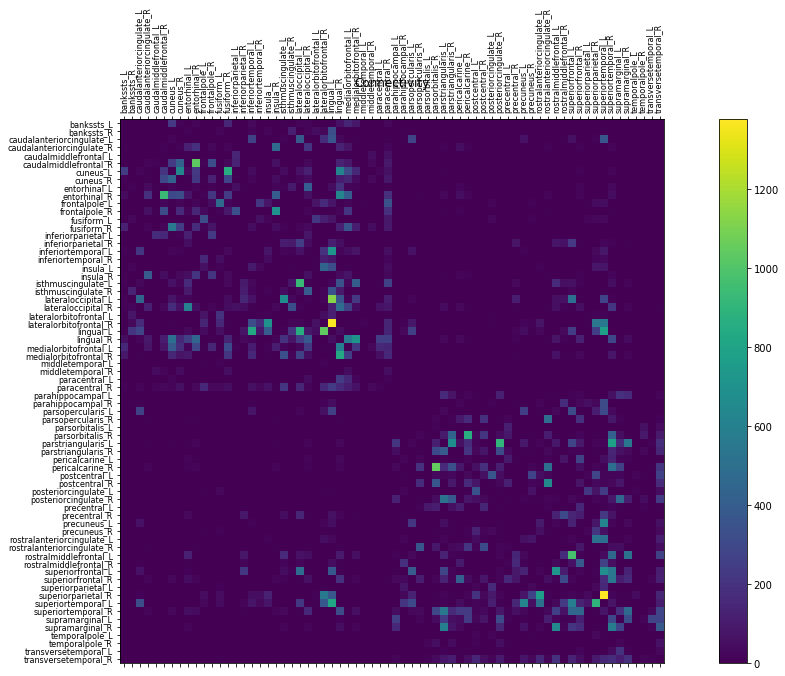

2020-01-13 17:33:49,909 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fca9326a828>
2020-01-13 17:33:49,914 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2020-01-13 17:33:49,915 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fca9326a828>
2020-01-13 17:33:49,919 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2020-01-13 17:33:50,035 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:33:50,036 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2020-01-13 17:33:50,407 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:33:50,529 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:33:50,533 - DEBUG - matplotlib.axes._base - title position was updated manually, not adjusting
2020-01-13 17:33:50,911 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:33:50,

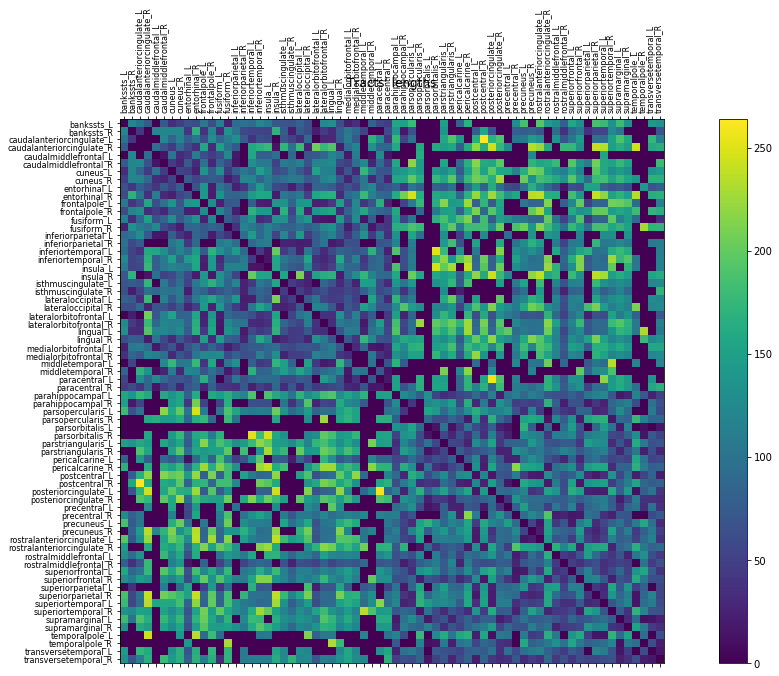

(<Figure size 1440x720 with 2 Axes>,
 <Figure size 1440x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca932da780>)

In [8]:
from tvb.datatypes.connectivity import Connectivity
connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)
connectivity.configure()
plotter.plot_tvb_connectivity(connectivity)

## 2. Prepare TVB simulator <br> (region mean field model, integrator, monitors etc)

In [9]:
from tvb_multiscale.simulator_tvb.simulator import Simulator
from tvb_multiscale.simulator_tvb.models.reduced_wong_wang_exc_io_inh_i \
    import ReducedWongWangExcIOInhI
from tvb.simulator.monitors import Raw  # , Bold, EEG

# Create a TVB simulator and set all desired inputs
# (connectivity, model, surface, stimuli etc)
# We choose all defaults in this example
simulator = Simulator()
simulator.model = ReducedWongWangExcIOInhI()
simulator.model.J_i = np.array([0.1, ]) # Feedback inhibition

simulator.connectivity = connectivity
simulator.integrator.dt = 0.1
simulator.integrator.noise.nsig = np.array([0.001])

mon_raw = Raw(period=simulator.integrator.dt)
# Some extra monitors for neuroimaging measures:
# mon_bold = Bold(period=2000.)
# mon_eeg = EEG(period=simulator.integrator.dt)
simulator.monitors = (mon_raw, )  # mon_bold, mon_eeg

2020-01-13 17:33:52,539 - WARNING - tvb.simulator.common - psutil module not available: no warnings will be issued when a
    simulation may require more memory than available
2020-01-13 17:33:52,548 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.coupling.HyperbolicTangent.b = NArray(label=':math:`b`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2020-01-13 17:33:52,552 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.coupling.Kuramoto.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2020-01-13 17:33:52,775 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.oscillator.Generic2dOscillator.gamma = NArray(label=':math:`\\gamma`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
20

## 3. Build and connect the NEST network model <br> (networks of spiking neural populations for fine-scale <br>regions, stimulation devices, spike detectors etc)

In [10]:
# Select the regions for the fine scale modeling with NEST spiking networks
number_of_regions = simulator.connectivity.region_labels.shape[0]
nest_nodes_ids = []  # the indices of fine scale regions modeled with NEST
# We model parahippocampal cortices (left and right) with NEST
for id in range(number_of_regions):
    if simulator.connectivity.region_labels[id].find("hippo") > 0:
        nest_nodes_ids.append(id)
        
from tvb_nest.nest_models.builders.models.red_ww_exc_io_inh_i_multisynapse \
    import RedWWExcIOInhIMultisynapseBuilder

# Build a NEST network model with the corresponding builder
# Using all default parameters for this example
nest_model_builder = RedWWExcIOInhIMultisynapseBuilder(simulator, nest_nodes_ids, config=config)


# or...

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

nest_model_builder.population_order = 100

exc_pop_scale=1.0
inh_pop_scale=0.7
exc_pop_size = int(nest_model_builder.population_order * exc_pop_scale)
inh_pop_size = int(nest_model_builder.population_order * inh_pop_scale)

E_ex=0.0  # mV    
E_in=-70.0  # mV    
E_rev = np.array([E_ex] +  # exc spikes (AMPA,rec, NMDA)
                 [E_in] +  # inh spikes (GABA)
                 nest_model_builder.number_of_nodes * [E_ex])  # ext, exc spikes (AMPA,ext)

tau_rise_ex = 2.0      # tau_rise_NMDA =2.0 ms
tau_decay_ex=100.0   # maximum(AMPA,rec, NMDA) = maximum(2.0, 100.0) ms    
tau_decay_ex_ext = 2.0 # ms, for external excitatory spikes(AMPA, ext)
tau_rise_in=1.0   # assuming tau_rise_GABA = 1.0 ms
tau_decay_in=10.0  # tau_decay_GABA =10.0 ms
tau_rise = np.array([tau_rise_ex] +  # exc spikes (AMPA,rec, NMDA)
                    [tau_rise_in] +  # inh spikes (GABA)
                    nest_model_builder.number_of_nodes * [tau_rise_ex])  # ext, exc spikes (AMPA,ext)
tau_decay = np.array([tau_decay_ex] +  # exc spikes (AMPA,rec, NMDA)
                     [tau_decay_in] +  # inh spikes (GABA)
                     nest_model_builder.number_of_nodes * [tau_decay_ex_ext])  # ext, exc spikes (AMPA,ext)
        
common_params = {
    "V_th": -50.0,  # mV    
    "V_reset": -55.0,  # mV  
    "V_peak": 0.0,  # mV  
    "E_L": -70.0,  # mV 
    "E_rev": E_rev,
    "tau_w": 1000.0,  # ms, a very large tau_w to practically eliminate spike adaptation current in this example
    "tau_rise": tau_rise,    # ms
    "tau_decay": tau_decay,  # ms
    }
nest_model_builder.params_ex = dict(common_params)
nest_model_builder.params_ex.update({
    "C_m": 500.0,  # pF
    "g_L": 25.0,  # nS
    "t_ref": 2.0,  # ms
    })
nest_model_builder.params_in = dict(common_params)
nest_model_builder.params_in.update({
    "C_m": 200.0,  # pF
    "g_L": 20.0,  # nS
    "t_ref": 1.0,  # ms
    })


# Populations' configurations
# When any of the properties model, params and scale below depends on regions,
# set a handle to a function with
# arguments (region_index=None) returning the corresponding property
nest_model_builder.default_population["model"] = "aeif_cond_beta_multisynapse"
nest_model_builder.populations = [
    {"label": "E", "model": nest_model_builder.default_population["model"],
     "nodes": None,  # None means "all"
     "params": nest_model_builder.params_ex,
     "scale": exc_pop_scale},
    {"label": "I", "model": nest_model_builder.default_population["model"],
     "nodes": None,  # None means "all"
     "params": nest_model_builder.params_in,
     "scale": 1.0}
  ]

# Within region-node connections
# When any of the properties model, conn_spec, weight, delay, receptor_type below
# set a handle to a function with
# arguments (region_index=None) returning the corresponding property
nest_model_builder.populations_connections = [
     #              ->
    {"source": "E", "target": "E",  # E -> E This is a self-connection for population "E"
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": nest_model_builder.tvb_model.w_p[0],
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 1, "nodes": None},  # None means "all"
    {"source": "E", "target": "I",  # E -> I
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": 1.0,
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 1, "nodes": None},  # None means "all"
    {"source": "I", "target": "E",  # I -> E
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": nest_model_builder.tvb_model.J_i[0],
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 2, "nodes": None},  # None means "all"
    {"source": "I", "target": "I",  # I -> I This is a self-connection for population "I"
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": 1.0,
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 2, "nodes": None}  # None means "all"
    ]


# Among/Between region-node connections
# Given that only the AMPA population of one region-node couples to
# all populations of another region-node,
# we need only one connection type
        
# When any of the properties model, conn_spec, weight, delay, receptor_type below
# depends on regions, set a handle to a function with
# arguments (source_region_index=None, target_region_index=None)

from tvb_multiscale.spiking_models.builders.templates \
    import scale_tvb_weight, tvb_delay, receptor_by_source_region
    
nest_model_builder.nodes_connections = [
    #              ->
    {"source": "E", "target": ["E", "I"],
     "model": nest_model_builder.default_nodes_connection["model"],
     "conn_spec": nest_model_builder.default_nodes_connection["conn_spec"],
   #  weight scaling the TVB connectivity weight
     "weight": lambda source_node, target_node: 
                 scale_tvb_weight(source_node, target_node, 
                                  nest_model_builder.tvb_weights, scale=nest_model_builder.tvb_model.G[0]),
   # additional delay to the one of TVB connectivity
     "delay": lambda source_node, target_node: 
                 tvb_delay(source_node, target_node, nest_model_builder.tvb_delays),  
    # Each region emits spikes in its own port:
     "receptor_type": lambda source_region_index, target_region_index=None: 
                         receptor_by_source_region(source_region_index, target_region_index, start=3),
     "source_nodes": None, "target_nodes": None}  # None means "all"
    ]


# Creating  devices to be able to observe NEST activity:
# Labels have to be different
nest_model_builder.output_devices = []
connections = OrderedDict({})
#          label <- target population
connections["E"] = "E"
connections["I"] = "I"
nest_model_builder.output_devices.append(
    {"model": "spike_detector", "params": {},
     "connections": connections, "nodes": None})  # None means "all"

connections = OrderedDict({})
#               label    <- target population
connections["Excitatory"] = "E"
connections["Inhibitory"] = "I"
params = dict(nest_model_builder.config.nest.NEST_OUTPUT_DEVICES_PARAMS_DEF["multimeter"])
params["interval"] = nest_model_builder.nest_instance.GetKernelStatus("resolution")  # nest_model_builder.monitor_period
params['record_from'] = ["V_m"]
nest_model_builder.output_devices.append(
    {"model": "multimeter", "params": params,
     "connections": connections, "nodes": None})  # None means "all"
    
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------

nest_network = nest_model_builder.build_spiking_network()


2020-01-13 17:33:53,755 - INFO - tvb_nest.nest_models.builders.base - Loading a NEST instance...
2020-01-13 17:33:53,755 - INFO - tvb_nest.nest_models.builders.base - Loading a NEST instance...
2020-01-13 17:33:53,757 - INFO - tvb_nest.nest_models.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-01-13 17:33:53,757 - INFO - tvb_nest.nest_models.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-01-13 17:33:53,759 - INFO - tvb_nest.nest_models.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-01-13 17:33:53,759 - INFO - tvb_nest.nest_models.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-01-13 17:33:53,761 - INFO - tvb_nest.nest_models.builders.base - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2020-01-13 17:33:53,761 - INFO - tvb_nest.nest_models.builders.base - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2020-01-13 17:33:5

2020-01-13 17:33:54,750 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model multimeter for Inhibitory created!
2020-01-13 17:33:54,750 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model multimeter for Inhibitory created!
2020-01-13 17:33:54,764 - INFO - tvb_multiscale.spiking_models.network - <class 'tvb_nest.nest_models.network.NESTNetwork'> created!
2020-01-13 17:33:54,764 - INFO - tvb_multiscale.spiking_models.network - <class 'tvb_nest.nest_models.network.NESTNetwork'> created!
2020-01-13 17:33:54,768 - INFO - tvb_nest.nest_models.network - <class 'tvb_nest.nest_models.network.NESTNetwork'> created!
2020-01-13 17:33:54,768 - INFO - tvb_nest.nest_models.network - <class 'tvb_nest.nest_models.network.NESTNetwork'> created!


## 4. Build the TVB-NEST interface

In [11]:
from tvb_nest.interfaces.builders.models.ww_deco2014 import WWDeco2014Builder as InterfaceWWDeco2014Builder

# Build a TVB-NEST interface with all the appropriate connections between the
# TVB and NEST modelled regions
# Using all default parameters for this example
tvb_nest_builder = InterfaceWWDeco2014Builder(simulator, nest_network, nest_nodes_ids, 
                                              exclusive_nodes=True, N_E=100)
# or...

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

from tvb_multiscale.spiking_models.builders.templates \
    import random_normal_tvb_weight, tvb_delay, receptor_by_source_region


N_E = 100 # The number of excitatory neurons per region

# TVB -> NEST

# # For directly setting an external current parameter in NEST neurons instantaneously:
# tvb_nest_builder.tvb_to_nest_interfaces = [
#     {"model": "current",  "parameter": "I_e",
# # ---------Properties potentially set as function handles with args (nest_node_id=None)---------------------------
#      "interface_weights": 1.0 * N_E,
# # ----------------------------------------------------------------------------------------------------------------
# #                  TVB sv -> NEST population
#      "connections": {"S_e": ["E", "I"]},
#      "nodes": None}]  # None means all here
    
# # For injecting current to NEST neurons via dc generators acting as TVB proxy nodes with TVB delays:
# tvb_nest_builder.tvb_to_nest_interfaces = [
#     {"model": "dc_generator", "params": {},
# # ---------Properties potentially set as function handles with args (nest_node_id=None)---------------------------
# #   Applied outside NEST for each interface device
#      "interface_weights": 1.0 * N_E,
# # -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
# #    To multiply TVB connectivity weight:
#      "weights": lambda tvb_node_id, nest_node_id: 
#                          random_normal_tvb_weight(tvb_node_id, nest_node_id, 
#                                                   simulator.model.G[0]*tvb_nest_builder.tvb_weights, sigma=sigma),
# #    To add to TVB connectivity delay:
#      "delays": lambda tvb_node_id, nest_node_id: 
#                     tvb_delay(source_node, target_node, tvb_nest_builder.tvb_delays),
# # ----------------------------------------------------------------------------------------------------------------
# #    TVB sv -> NEST population
#      "connections": {"S_e": ["E", "I"]},
#      "source_nodes": None, "target_nodes": None}]  # None means all here

# For spike transmission from TVB to NEST devices acting as TVB proxy nodes with TVB delays:



tvb_nest_builder.tvb_to_nest_interfaces = [
    {"model": "inhomogeneous_poisson_generator",
     "params": {"allow_offgrid_times": False},
# # ---------Properties potentially set as function handles with args (nest_node_id=None)-------------------------
     "interface_weights": 1.0 * N_E/10, 
# Applied outside NEST for each interface device
# -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
#   To multiply TVB connectivity weight:
    "weights": lambda tvb_node_id, nest_node_id: 
                 random_normal_tvb_weight(tvb_node_id, nest_node_id, 
                                          tvb_nest_builder.tvb_model.G[0]*tvb_nest_builder.tvb_weights, sigma=0.1),
#                                     To add to TVB connectivity delay:
    "delays": lambda tvb_node_id, nest_node_id: 
                 tvb_delay(source_node, target_node, tvb_nest_builder.tvb_delays),
    "receptor_types": lambda tvb_node_id, nest_node_id: 
                         receptor_by_source_region(tvb_node_id, nest_node_id, start=1),
    # --------------------------------------------------------------------------------------------------------------
    #             TVB sv -> NEST population
    "connections": {"R_e": ["E", "I"]},
    "source_nodes": None, "target_nodes": None}]  # None means all here


# NEST -> TVB:
# Use S_e and S_i instead of r_e and r_i
# for transmitting to the TVB state variables directly
connections = OrderedDict()
#            TVB <- NEST
connections["R_e"] = ["E"]
connections["R_i"] = ["I"]
tvb_nest_builder.nest_to_tvb_interfaces = [
    {"model": "spike_detector", "params": {},
# ------------------Properties potentially set as function handles with args (nest_node_id=None)--------------------
     "weights": 1.0, "delays": 0.0,
# -----------------------------------------------------------------------------------------------------------------
     "connections": connections, "nodes": None}]  # None means all here

tvb_nest_builder.w_tvb_to_current = 1000 * tvb_nest_builder.tvb_model.J_N[0]  # (nA of TVB -> pA of NEST)
# WongWang model parameter r is in Hz, just like poisson_generator assumes in NEST:
tvb_nest_builder.w_tvb_to_spike_rate = 1.0
# We return from a NEST spike_detector the ratio number_of_population_spikes / number_of_population_neurons
# for every TVB time step, which is usually a quantity in the range [0.0, 1.0],
# as long as a neuron cannot fire twice during a TVB time step, i.e.,
# as long as the TVB time step (usually 0.001 to 0.1 ms)
# is smaller than the neurons' refractory time, t_ref (usually 1-2 ms)
# For conversion to a rate, one has to do:
# w_spikes_to_tvb = 1/tvb_dt, to get it in spikes/ms, and
# w_spikes_to_tvb = 1000/tvb_dt, to get it in Hz
# given WongWang model parameter r is in Hz but tvb dt is in ms:
tvb_nest_builder.w_spikes_to_tvb = 1000.0 / tvb_nest_builder.tvb_dt
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------

tvb_nest_model = tvb_nest_builder.build_interface()

2020-01-13 17:33:55,059 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan.WilsonCowan.state_variable_range = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
2020-01-13 17:33:55,064 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb_multiscale.simulator_tvb.models.wilson_cowan_constraint.WilsonCowan.state_variable_boundaries = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
2020-01-13 17:33:55,065 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb_multiscale.simulator_tvb.models.wilson_cowan_constraint.WilsonCowan.state_variable_range = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0.,

## 5. Configure simulator, simulate, gather results

In [12]:
# Configure the simulator with the TVB-NEST interface...
simulator.configure(tvb_spikeNet_interface=tvb_nest_model)
# ...and simulate!
t = time.time()
results = simulator.run(simulation_length=100.0)
# Integrate NEST one more NEST time step so that multimeters get the last time point
# unless you plan to continue simulation later
simulator.run_spiking_simulator(simulator.tvb_spikeNet_interface.nest_instance.GetKernelStatus("resolution"))
print("\nSimulated in %f secs!" % (time.time() - t))

2020-01-13 17:33:56,240 - DEBUG - tvb_multiscale.simulator_tvb.models.reduced_wong_wang_exc_io_inh_i - building observer with code:
def observe(state):
    S_e,S_i,R_e,R_i = state
    return numpy.array([S_e,S_i,R_e,R_i])
2020-01-13 17:33:56,242 - INFO - tvb_multiscale.simulator_tvb.simulator - Region simulation with 68 ROI nodes
2020-01-13 17:33:56,242 - INFO - tvb_multiscale.simulator_tvb.simulator - Region simulation with 68 ROI nodes
2020-01-13 17:33:56,245 - DEBUG - tvb_multiscale.simulator_tvb.simulator - Estimated history shape is (879.3333333333334, 4, 68, 1)
2020-01-13 17:33:56,245 - DEBUG - tvb_multiscale.simulator_tvb.simulator - Estimated history shape is (879.3333333333334, 4, 68, 1)
2020-01-13 17:33:56,247 - INFO - tvb_multiscale.simulator_tvb.simulator - Memory requirement estimate: simulation will need about 4.4 MB
2020-01-13 17:33:56,247 - INFO - tvb_multiscale.simulator_tvb.simulator - Memory requirement estimate: simulation will need about 4.4 MB
2020-01-13 17:33:56,

In [13]:
# Clean-up NEST simulation
simulator.tvb_spikeNet_interface.nest_instance.Cleanup()

# Gather the results
t = results[0][0]
source = results[0][1]

# Put the results in a Timeseries instance
from tvb_scripts.time_series.model import TimeSeriesRegion

source_ts = TimeSeriesRegion(source, time=t,
               connectivity=simulator.connectivity,
               labels_ordering=["Time", "Synaptic Gating Variable", "Region", "Neurons"],
               labels_dimensions=
                    {"Synaptic Gating Variable": ["S_e", "S_i", "R_e", "R_i"],
                     "Region": simulator.connectivity.region_labels.tolist()},
               sample_period=simulator.integrator.dt)
source_ts.configure()
source_ts

In [14]:
S_e = source_ts.get_state_variables("S_e")
S_i = source_ts.get_state_variables("S_i")
R_e = source_ts.get_state_variables("R_e")
R_i = source_ts.get_state_variables("R_i")

## Plot results

2020-01-13 17:35:16,961 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:17,478 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:17,719 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:18,057 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:18,351 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:18,544 - DEBUG - matplotlib.axes._base - update_title_pos


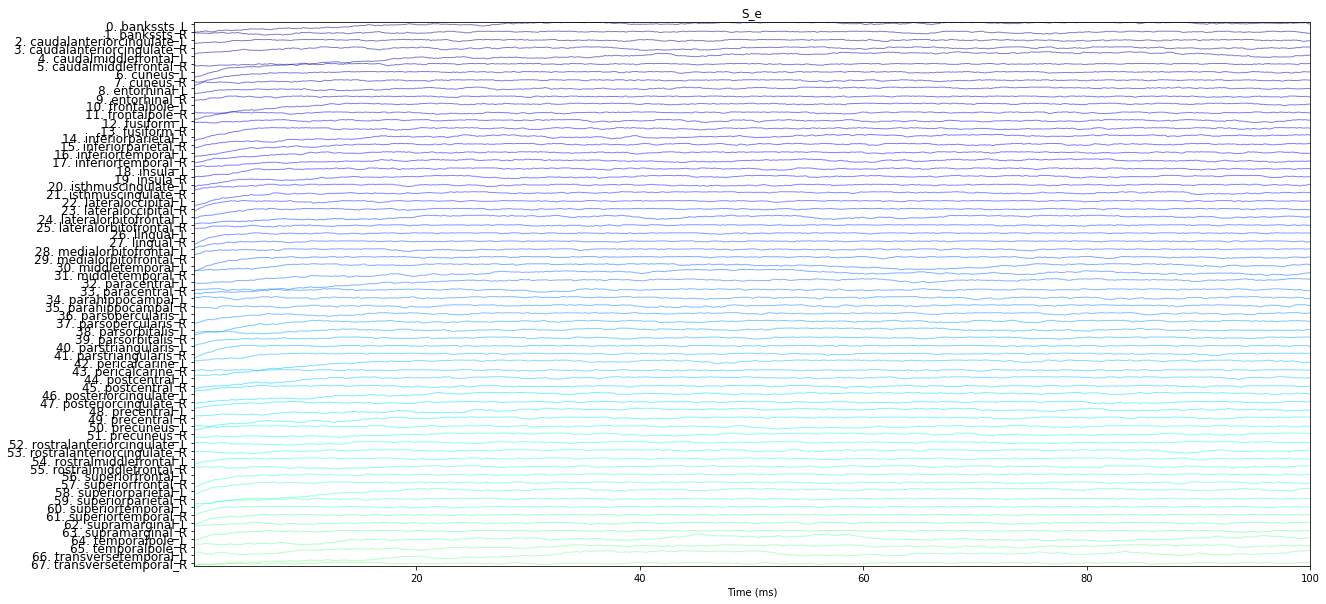

2020-01-13 17:35:19,030 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:19,267 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:19,418 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:19,649 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:19,848 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:19,986 - DEBUG - matplotlib.axes._base - update_title_pos


2020-01-13 17:35:20,313 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:20,532 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:20,684 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:20,899 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:21,142 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:21,347 - DEBUG - matplotlib.axes._base - update_title_pos


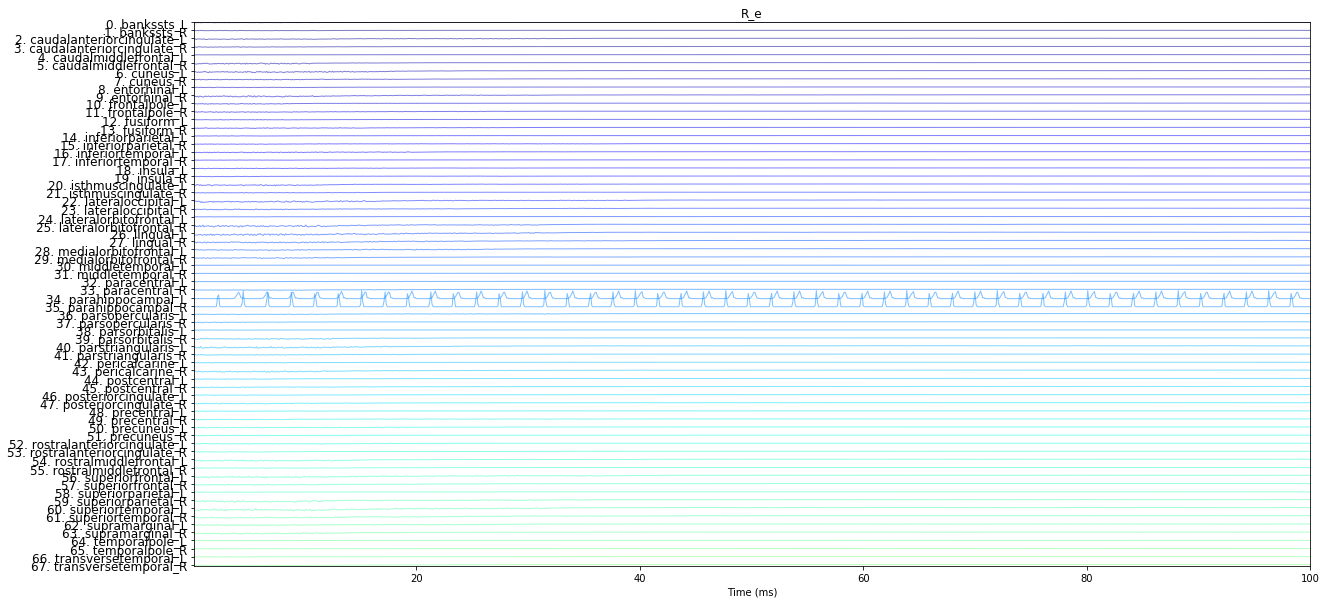

2020-01-13 17:35:21,796 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:22,128 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:22,333 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:22,652 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:22,951 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:23,149 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

In [15]:
# For raster plot:
plotter.plot_raster(S_e, title="Region S_e Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_raster(S_i, title="Region S_i Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_raster(R_e, title="Region R_e Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_raster(R_i, title="Region R_i Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);

2020-01-13 17:35:23,551 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:23,789 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:23,876 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:24,038 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:24,087 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:24,125 - DEBUG - matplotlib.axes._base - update_title_pos


2020-01-13 17:35:24,399 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:24,641 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:24,694 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:24,861 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:24,896 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:24,926 - DEBUG - matplotlib.axes._base - update_title_pos


2020-01-13 17:35:25,226 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:25,497 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:25,584 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:25,834 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:25,887 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:25,925 - DEBUG - matplotlib.axes._base - update_title_pos


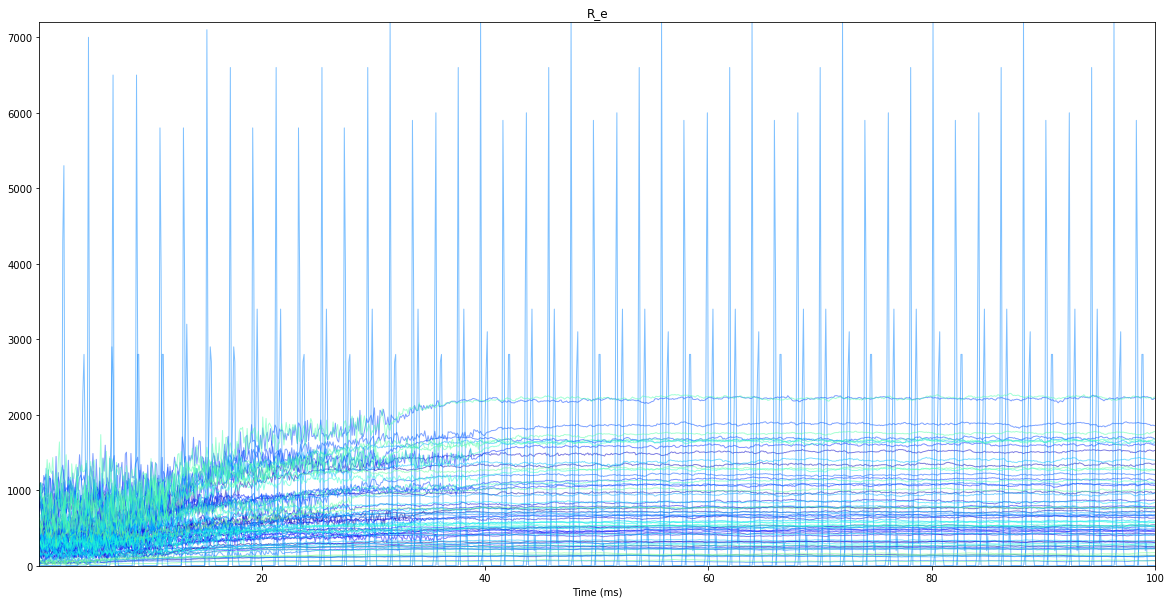

2020-01-13 17:35:26,263 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:26,594 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:26,703 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:26,963 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,017 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,055 - DEBUG - matplotlib.axes._base - update_title_pos


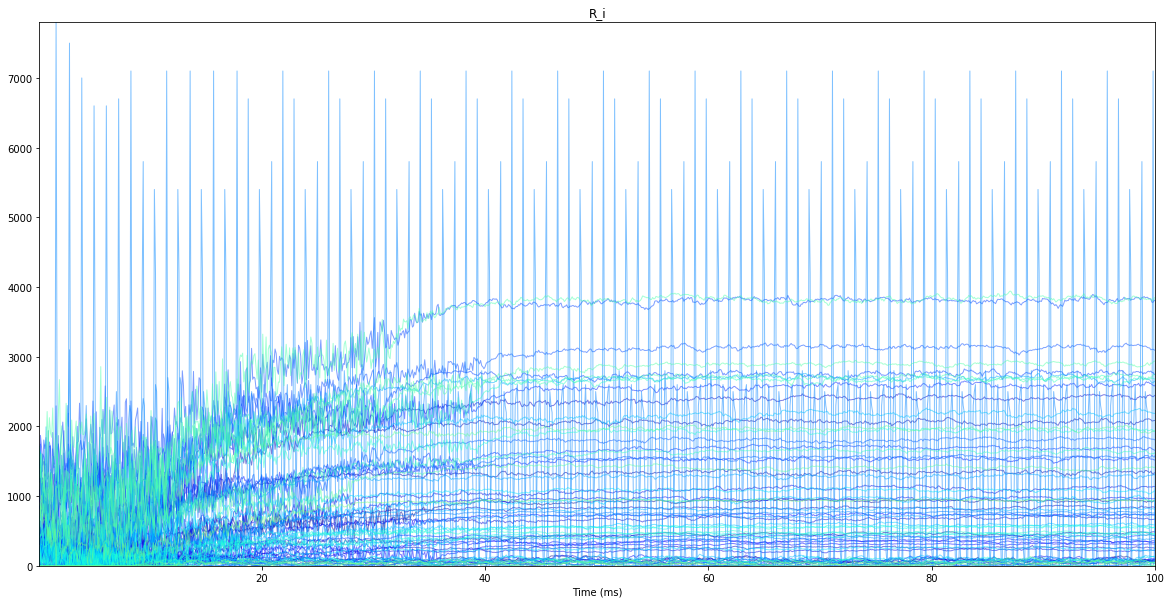

<Figure size 432x288 with 0 Axes>

In [16]:
# For timeseries plot:
plotter.plot_timeseries(S_e, title="Region S_e Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_timeseries(S_i, title="Region S_i Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_timeseries(R_e, title="Region R_e Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_timeseries(R_i, title="Region R_i Time Series Raster", figsize=config.figures.NOTEBOOK_SIZE);

In [17]:
# # For timeseries plot:
# plotter.plot_timeseries(S_e.get_subspace(tvb_nest_model.spiking_nodes_ids), 
#                         title="Region S_e Time Series", 
#                         figsize=config.figures.NOTEBOOK_SIZE);
# plotter.plot_timeseries(S_i.get_subspace(tvb_nest_model.spiking_nodes_ids), 
#                         title="Region S_i Time Series", 
#                         figsize=config.figures.NOTEBOOK_SIZE);
# plotter.plot_timeseries(R_e.get_subspace(tvb_nest_model.spiking_nodes_ids), 
#                         title="Region R_e Time Series", 
#                         figsize=config.figures.NOTEBOOK_SIZE);
# plotter.plot_timeseries(R_i.get_subspace(tvb_nest_model.spiking_nodes_ids), 
#                         title="Region R_i Time Series", 
#                         figsize=config.figures.NOTEBOOK_SIZE);

2020-01-13 17:35:27,468 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,579 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,602 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,681 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,700 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,711 - DEBUG - matplotlib.axes._base - update_title_pos


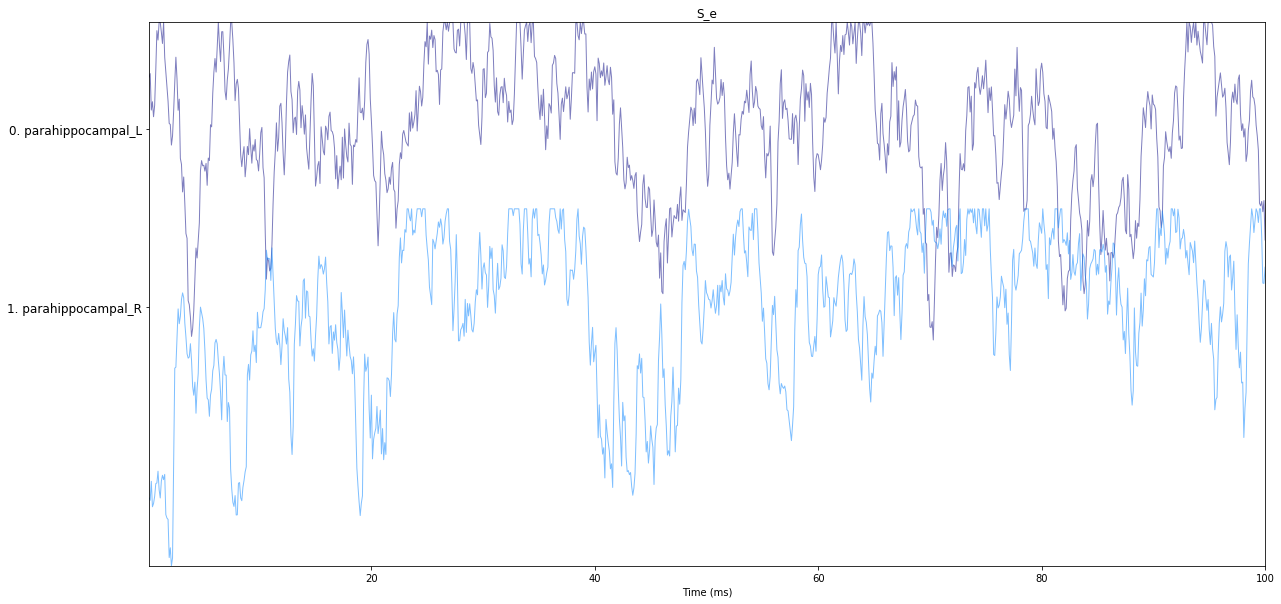

2020-01-13 17:35:27,818 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,901 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:27,923 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:27,993 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,011 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,023 - DEBUG - matplotlib.axes._base - update_title_pos


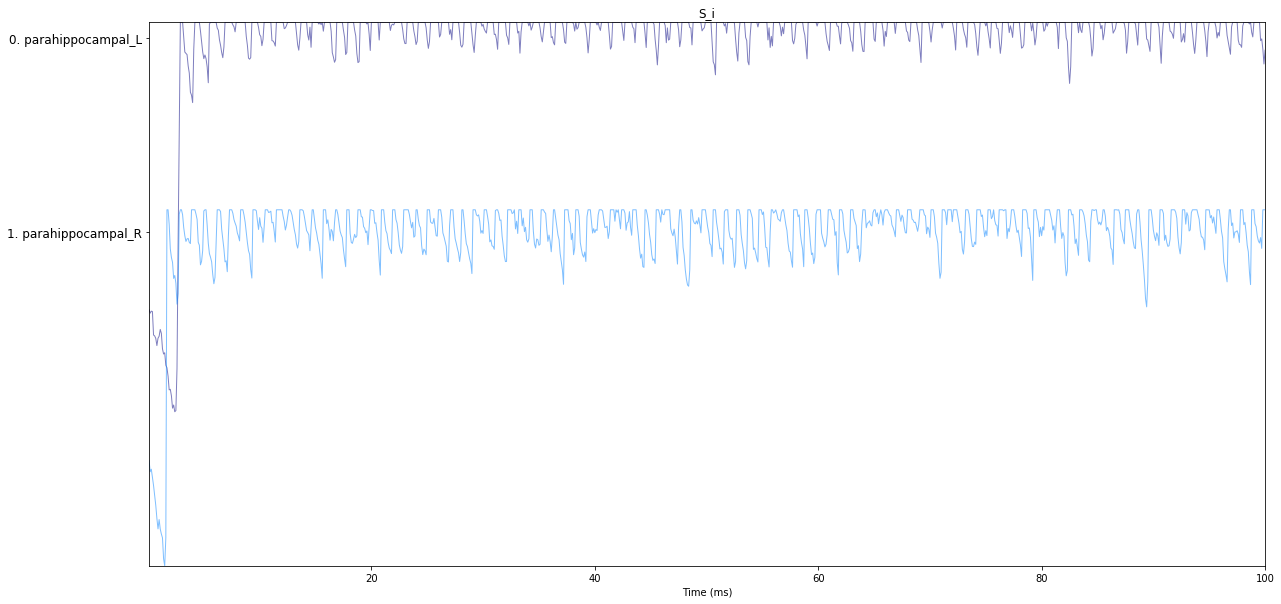

2020-01-13 17:35:28,135 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,254 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:28,280 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,374 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,395 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,405 - DEBUG - matplotlib.axes._base - update_title_pos


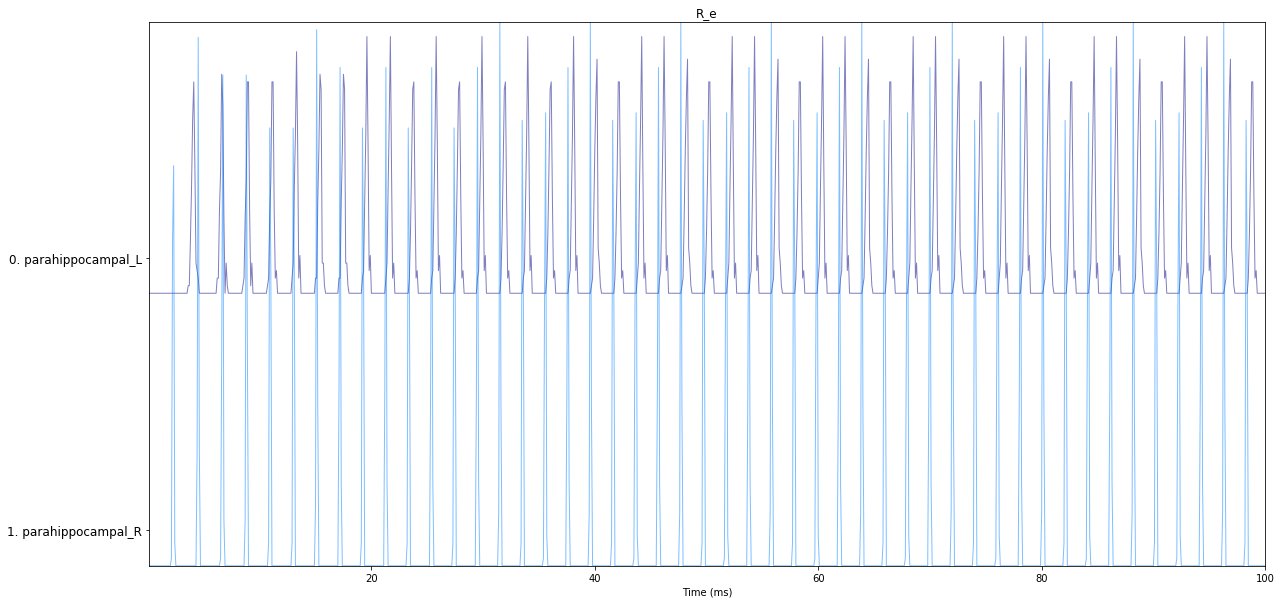

2020-01-13 17:35:28,531 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,674 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-01-13 17:35:28,701 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,801 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,821 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:28,836 - DEBUG - matplotlib.axes._base - update_title_pos


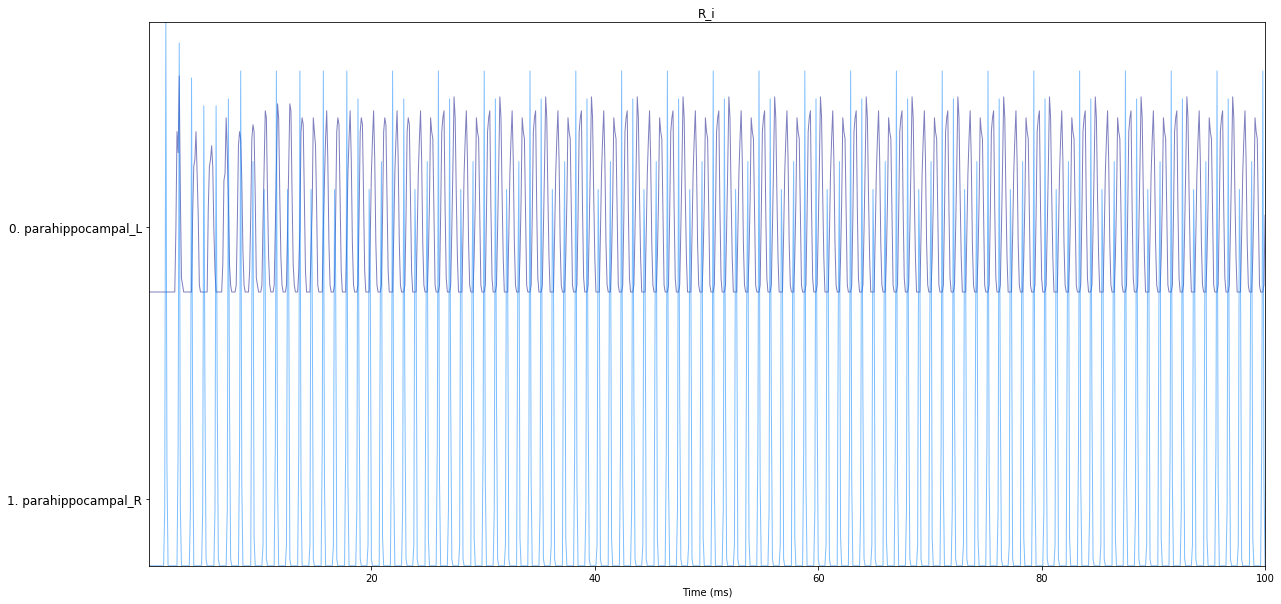

<Figure size 432x288 with 0 Axes>

In [18]:
# For raster plot:
plotter.plot_raster(S_e.get_subspace(tvb_nest_model.spiking_nodes_ids), 
                    title="Region S_e Time Series Raster", 
                    figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_raster(S_i.get_subspace(tvb_nest_model.spiking_nodes_ids), 
                    title="Region S_i Time Series Raster", 
                    figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_raster(R_e.get_subspace(tvb_nest_model.spiking_nodes_ids), 
                    title="Region R_e Time Series Raster", 
                    figsize=config.figures.NOTEBOOK_SIZE);
plotter.plot_raster(R_i.get_subspace(tvb_nest_model.spiking_nodes_ids), 
                        title="Region R_i Time Series Raster", 
                        figsize=config.figures.NOTEBOOK_SIZE);

### Interactive time series plot

In [19]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# # Use this to skip completely the tvb-scripts plotter
# # from tvb.simulator.plot.timeseries_interactive import TimeSeriesInteractive
# # tvb_plotter = TimeSeriesInteractive(time_series=source_ts._tvb)
# # tvb_plotter.configure()
# # tvb_plotter.show()
# plotter.plot_timeseries_interactive(source_ts)

### Plot population mean membrane potential time series

2020-01-13 17:35:28,994 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-01-13 17:35:30,043 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,080 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,233 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,255 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,282 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,303 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,411 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,432 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,471 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,490 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,510 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:30,533 - DEBUG - matplotlib.axes

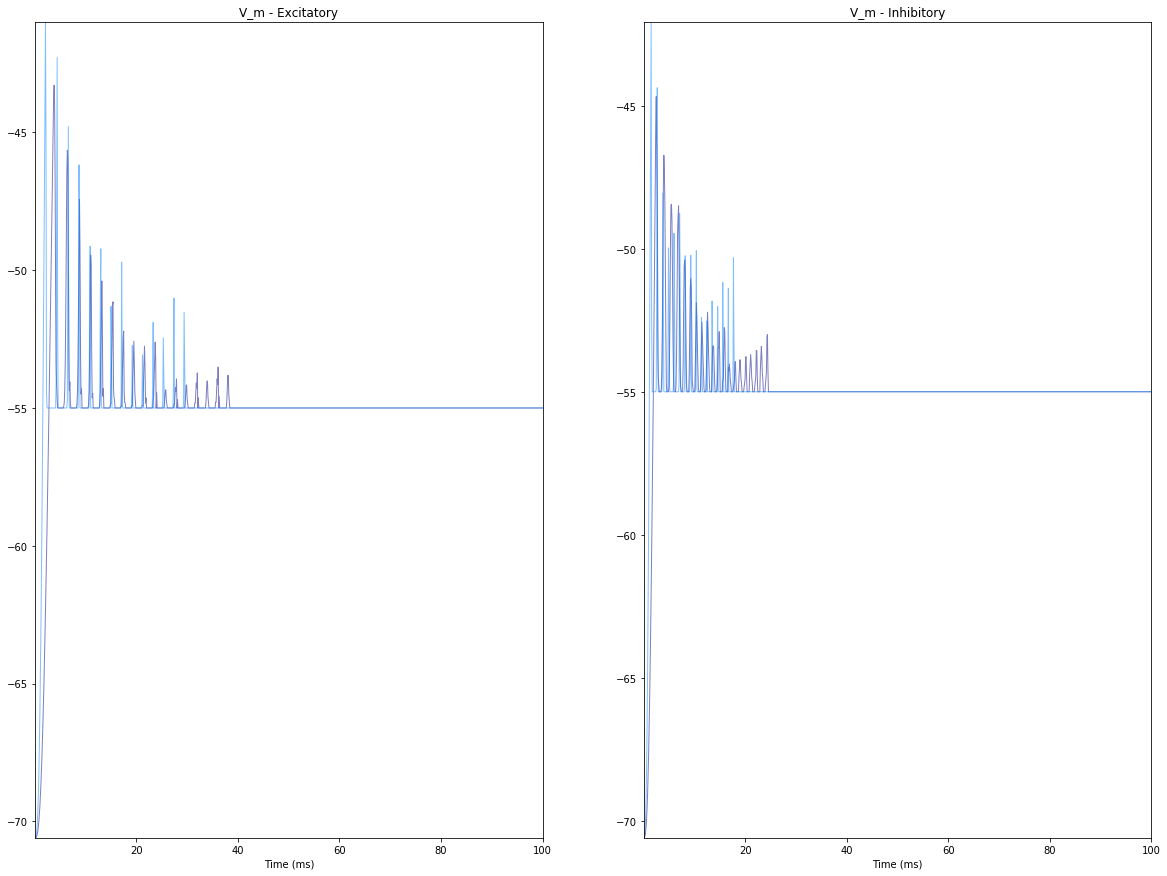

[(<Figure size 432x288 with 0 Axes>,
   <matplotlib.lines.Line2D at 0x7fca8a3ecb38>])]

<Figure size 432x288 with 0 Axes>

In [20]:
%matplotlib inline 
# Plot NEST multimeter variables
multimeter_mean_data = tvb_nest_model.get_mean_data_from_multimeter_to_TVBTimeSeries()
# print(multimeter_mean_data)
# print(multimeter_mean_data.variables_labels)
# plotter.plot_multimeter_raster(multimeter_mean_data, plot_per_variable=True,
#                                time_series_class=TimeSeriesRegion, 
#                                time_series_args={}, var_pop_join_str=" - ", 
#                                default_population_label="population",
#                                title="NEST region time series raster")
plotter.plot_multimeter_timeseries(multimeter_mean_data, plot_per_variable=True,
                                   time_series_class=TimeSeriesRegion, 
                                   time_series_args={}, var_pop_join_str=" - ", 
                                   default_population_label="population",
                                   title="NEST region time series")

### Plot spikes' raster and mean spike rate for NEST regions

2020-01-13 17:35:31,643 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,664 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,685 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,704 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,850 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,867 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,886 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,901 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,930 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,949 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,976 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:31,999 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:32,126 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:32,138 -

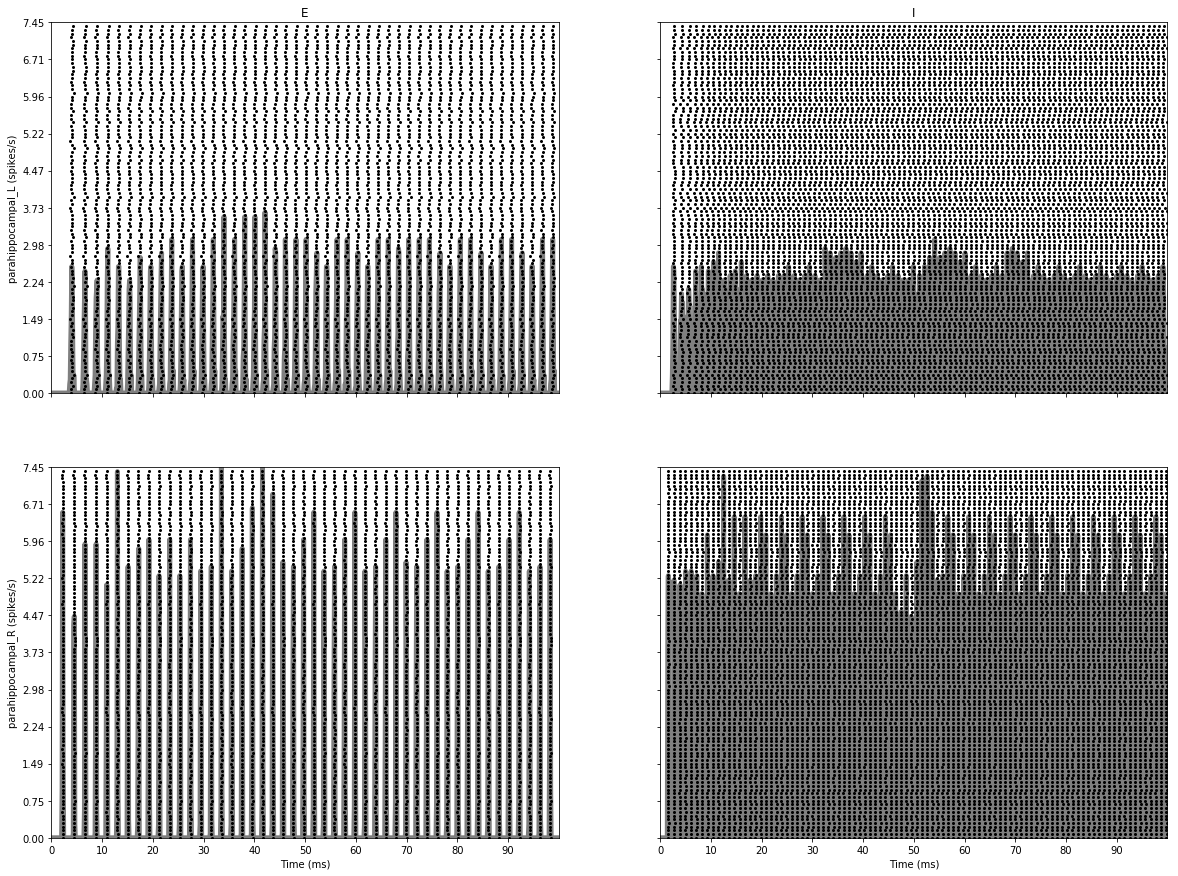

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot spikes and mean field spike rates
rates, spike_detectors = \
    tvb_nest_model.get_mean_spikes_rates_to_TVBTimeSeries(
        spikes_kernel_width= simulator.integrator.dt,  # ms
        spikes_kernel_overlap=0.0, time=t)
if spike_detectors is not None:
    plotter.plot_spikes(spike_detectors, rates=rates, title='Population spikes and mean spike rate')

### Plotting NEST network activity using xarray

TimeSeries (
  Dimensions ....... ['Time', 'Variable', 'Region', 'Population']
  Length ........... 1000
  Sample period .... 0.1
  Time units ....... 
  Time-series name . Mean data from Spiking Network multimeter
  Time-series type . TimeSeries
  [min, median, max]  [-70.5969, -55, -41.0083]
  dtype ............ float64
  shape ............ (1000, 1, 2, 2)
)
2020-01-13 17:35:33,342 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,377 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,399 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,420 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,450 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,479 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,520 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,546 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:33,644 - DEBUG - mat

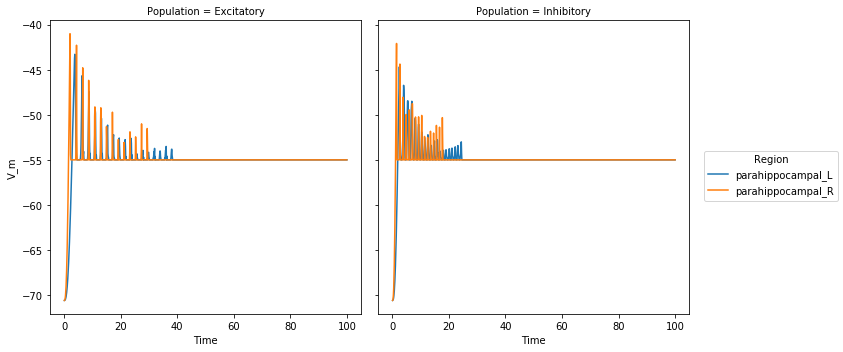

In [22]:
from tvb_scripts.time_series.time_series_xarray import TimeSeries as TimeSeriesXarray
import xarray as xr

multimeter_mean_data = TimeSeriesXarray(nest_network.get_mean_data_from_multimeter())
print(multimeter_mean_data)
multimeter_mean_data.plot_timeseries(plotter=plotter, per_variable=True, figsize=(10, 5))
# multimeter_mean_data.plot_raster(plotter=plotter, per_variable=True, linestyle="--", alpha=1.0, linewidth=0.5, figsize=(10, 5))



### Plotting NEST network spiking activity using xarray

2020-01-13 17:35:36,438 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:36,467 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:36,494 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:36,525 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:36,556 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fca89f41c50>
2020-01-13 17:35:36,557 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2020-01-13 17:35:36,560 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fca89f41c50>
2020-01-13 17:35:36,563 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2020-01-13 17:35:36,582 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:37,885 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:39,313 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-13 17:35:40,578 - DEBUG - matp

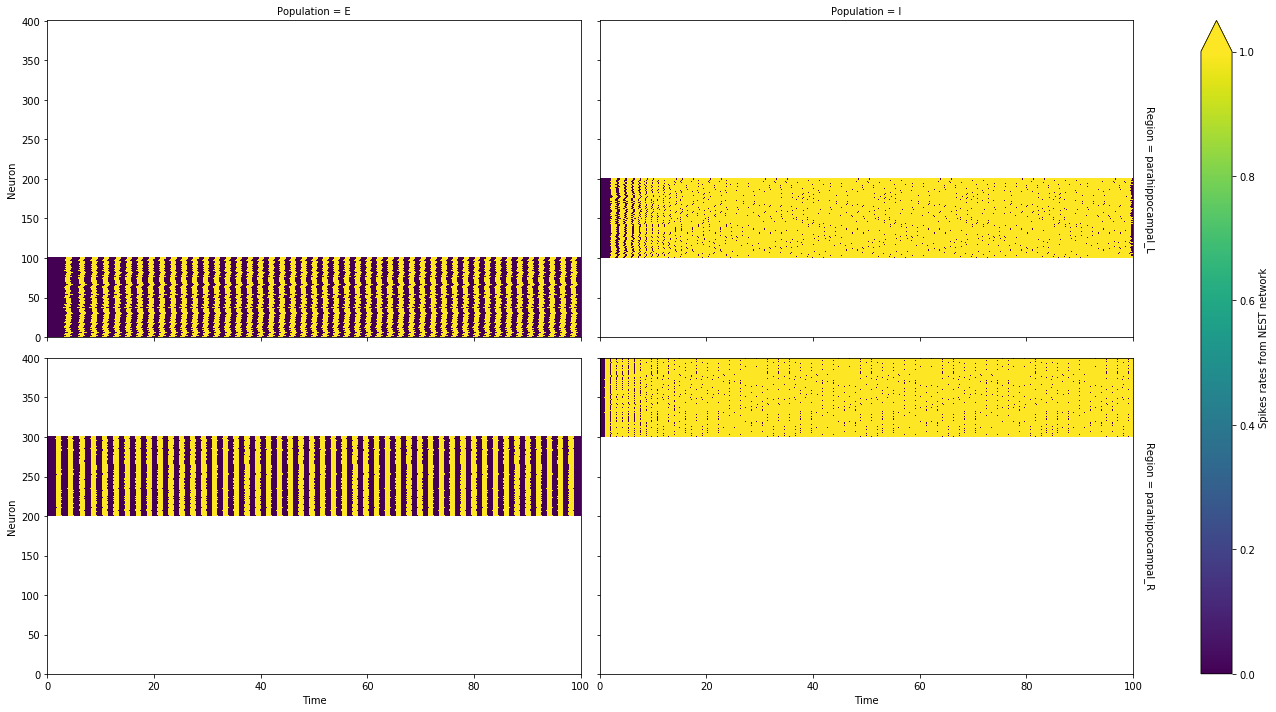

In [23]:
rates = nest_network.compute_spikes_rates(
            mode="per_neuron", population_devices=None, regions=None,
            devices_dim_name="Population", name="Spikes rates from NEST network",
            spikes_kernel_width=1.0, # spikes_kernel_n_intervals=10,
            spikes_kernel_overlap=0.5, min_spike_interval=None, time=np.arange(0, 100.0, 0.01),
            spikes_kernel=None)[0]

rates.plot(x=rates.dims[0], y=rates.dims[3], row=rates.dims[2], col=rates.dims[1], robust=True, figsize=(20, 10))
plotter.base._save_figure(figure_name="Spike rates per neuron")

# References

1 Paula Sanz Leon, Stuart A. Knock, M. Marmaduke Woodman, Lia Domide, <br>
  Jochen Mersmann, Anthony R. McIntosh, Viktor Jirsa (2013) <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling  <br>
  and multimodal neuroimaging. Brain Connectivity 3:121–145. <br>
   
3 Deco Gustavo, Ponce Alvarez Adrian, Dante Mantini, Gian Luca Romani, <br>
  Patric Hagmann and Maurizio Corbetta. <br>
  Resting-State Functional Connectivity Emerges from Structurally and <br>
  Dynamically Shaped Slow Linear Fluctuations. <br>
  The Journal of Neuroscience 32(27), 11239-11252, 2013.<br>

4 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>